<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Optimization" data-toc-modified-id="Optimization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Optimization</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Linear-Example---Data-Generation" data-toc-modified-id="Linear-Example---Data-Generation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Linear Example - Data Generation</a></span></li><li><span><a href="#Linear-Example---Analytic-Solution" data-toc-modified-id="Linear-Example---Analytic-Solution-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Linear Example - Analytic Solution</a></span></li><li><span><a href="#Linear-Example---Gradient-Descent" data-toc-modified-id="Linear-Example---Gradient-Descent-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Linear Example - Gradient Descent</a></span></li><li><span><a href="#Linear-Example---Optimization-Surface" data-toc-modified-id="Linear-Example---Optimization-Surface-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Linear Example - Optimization Surface</a></span></li><li><span><a href="#Linear-Example---Data-Standardization" data-toc-modified-id="Linear-Example---Data-Standardization-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Linear Example - Data Standardization</a></span></li><li><span><a href="#Problems-with-Gradient-Descent" data-toc-modified-id="Problems-with-Gradient-Descent-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Problems with Gradient Descent</a></span></li></ul></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Learning-schedules" data-toc-modified-id="Learning-schedules-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Learning schedules</a></span></li><li><span><a href="#Mini-batch-Variant" data-toc-modified-id="Mini-batch-Variant-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Mini-batch Variant</a></span></li></ul></li><li><span><a href="#Momentum" data-toc-modified-id="Momentum-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Momentum</a></span></li><li><span><a href="#Adaptive-Learning-Rates" data-toc-modified-id="Adaptive-Learning-Rates-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Adaptive Learning Rates</a></span><ul class="toc-item"><li><span><a href="#Adaptive-Gradient-Algorithm-(AdaGrad)" data-toc-modified-id="Adaptive-Gradient-Algorithm-(AdaGrad)-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Adaptive Gradient Algorithm (AdaGrad)</a></span></li><li><span><a href="#Root-Mean-Square-Propagation-(RMSProp)" data-toc-modified-id="Root-Mean-Square-Propagation-(RMSProp)-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Root Mean Square Propagation (RMSProp)</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#f(x)=x^2" data-toc-modified-id="f(x)=x^2-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>f(x)=x^2</a></span></li></ul></li></ul></li></ul></div>

In [0]:
# Preliminary imports - we'll be writing our own optimizers so we don't need scikit-learn
import matplotlib.pyplot as plt
import numpy as np

## Optimization ##
### Introduction ###
So you're working for a BIG company, you have a bunch of data ($\mathbf{x},\mathbf{y}$) for a core company process (these might be vectors of many inputs and outputs), and you would like to generate model(s) of this process using an extravagent number of parameters ($\mathbf{\beta}$). You have a meeting in an hour and you want to impress your boss with a nice curve that runs through your very complicated data, so you set up a complicated function based on every input you could imagine, and try to minimize the error

$$\chi^2 = \frac{1}{N}\sum_\mathrm{i}\left( f(\mathbf{\mathbf{x}_\mathrm{i},\mathbf{\beta}}) - y_\mathrm{i} \right)^2$$

In this case, your inputs ($\mathbf{x}$), outputs ($\mathbf{y}$), and parameters ($\mathbf{\beta}$) are really high dimensional, so you pull out the big guns (the clock is ticking and you have people to IMPRESS). You slap your model into scikit-learn and magically you watch your error fall down down down (maybe too far?). scikit-learn returns the parameters that have minimized this error, and you walk into your meeting armed with an impressive curve that is almost certainly overfit. You will owe the (undeserved) admiration of your peers to an optimization algorithm. 

Modern machine learning is built on top of optimization algorithms. When you are first starting to build models, you would be surprised how much you can do using packages like skikit-learn, and treating their training algorithms as as a black-box. The reason this is possible (and the reason this can get you into trouble) is because of the availability of a broad suite of optimization algorithms that can find minima of high dimensional functions (i.e., the parameters in your model that usually minimize your objective function under some constraint). Here we will go through three fundamental algorithms, <b>gradient descent (GD)</b>, <b>stochastic gradient descent (SGD)</b>, <b> gradient descent with momentum</b>. Once you have the feeling for these, we'll illustrated the use of some other algorithms and present some intuition for their use, without going into as much detail regarding their actual implementation. 

### Gradient Descent ###

Gradient descent (GD) is the simplest entry point to optimization and it is the parent from which many more sophisticated algorithms are derived. If you find yourself in some mountains and you know home is at the bottom of the valley, what do you do? You could potentially use a lot of information: the sun's position, the visible terrain, or you might use a radio to communicate with other hikers and try to triangulate your position. Different optimization methods are largely distinguished <i>by what kind of information they utilize</i> while trying to find the minimum of a function (i.e., home and the mountains respectively in this example). In <b>gradient descent</b> we decide that we will only use the local gradient to make our next move. Every so often we'll survey the ground <emph>right beneath our feet</emph> and change our direction based on the direction that leads most steeply downhill. This isn't too crazy: we want to get to the bottom of the mountain, so the fastest way might be to always follow the steepest downward direction. Algorithmically, this takes the form:

$$ \boldsymbol{\beta}_\mathrm{i+1} = \boldsymbol{\beta}_\mathrm{i} - \alpha \boldsymbol{\nabla}_{\beta}f\left(\boldsymbol{\beta}_\mathrm{i}\right) $$

where the $\boldsymbol{\nabla}_{\beta}f\left(\boldsymbol{\beta}\right)$ indicates the <b>gradient</b> (or vector of partial derivatives with respect to each parameter, $\beta_\mathrm{j}$, think through the 1d case to rationalize the minus sign).  Here, $\boldsymbol{\beta}_\mathrm{i}$ is a vector of the model parameters, at the "i-th" step. Thus, $\boldsymbol{\beta}$ is acting just like a coordinate system (e.g., x,y,z) and we are nagivating these coordinates looking for a minimum. Lastly, $\alpha$ is a <b>step</b> parameter, or "<b>learning rate</b>", which determines how far to step in parameter space before checking the gradient again.  

To make this a working algorithm we still have to account for how to start and finish. Starting is easy, we make it the responsibility of the user to give a $\boldsymbol{\beta}_\mathrm{0}$ as an initial guess. As discussed in the lecture notes, for a convex objective function the final solution isn't sensitive to the initial guess, but a bad guess will take longer to converge. For a non-convex objective function, the final solution can be sensitive to the intitial guess and this will motivate some of the later modifications we'll make to this algorithm. 

For stopping there are several options. The most general is to stop once the change in $\boldsymbol{\beta}$ becomes small (e.g., $||\boldsymbol{\beta}_\mathrm{i}-\boldsymbol{\beta}_\mathrm{i+1}||_{2}<\varepsilon$, where $\varepsilon$ is a problem specific value and $||\cdot||_{2}$ is the L2 norm). As discussed in class, we will commonly be concerned with overfitting when we are training models. A second stopping criteria we might use might be based on the value of the objective function for a witheld validation dataset. The last criteria you will encounter is a practical one: simply stop after a fixed number of steps. This is commonly used when the objective function is very expensive to calculate, or if you are afraid of overfitting and just want an estimated solution. 

Let's write a generic gradient descent algorithm (with two of the three stopping options):

In [0]:
# Our gradient descent function
def grad_descent(params,grad,alpha=0.002,thresh=0.00001,max=1E6):    

    # Each iteration is one parameter update ("epoch")
    for i in range(int(max)):
        
        # Calculate update for this epoch/iteration
        params += [ params[-1] - alpha * grad(params[-1]) ]

        # Check break conditions
        if np.sum((params[-1]-params[-2])**(2.0))**(0.5) < thresh:
            return np.array(params)
    
    # return the parameters as a numpy array            
    print("WARNING: maximum number of iterations reached ({})".format(max))
    return np.array(params)

Here the function accepts an initial guess (`params`), a function that returns the gradient given the params (`grad`), a learning rate (`alpha`), a stopping threshold based on the L2 norm (`thresh`), and a maximum number of iterations (`max`). Note, gradient descent depends on being able to analytically evaluate the gradient, you will typically have to write this function yourself as it is problem/model specific. 

#### Linear Example - Data Generation ####
Before evaluating our gradient descent implementation, let's generate data using a linear model with some noise. We'll be able to solve this analytically  and compare the results with the behavior of the optimization algorithms. 

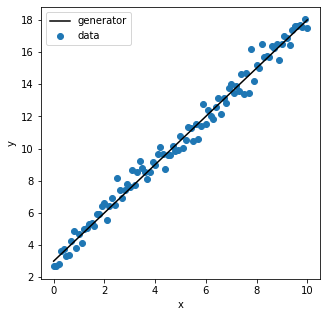

In [8]:
# Fix the seed for reproducibility
np.random.seed(10104032)

# Generate a linear dataset 
a=1.5
b=3.
stdev=0.5
x=np.linspace(0,10,101)
y=a*x + b + np.random.normal(0.0,stdev,len(x))

# Plot the data
plt.figure(figsize=(5,5))
plt.plot(x,a*x+b,color='k',label="generator")
plt.scatter(x,y,label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### Linear Example - Analytic Solution ####

Now we want to generate a linear model for this data, 

$$ \mathbf{y} = a\mathbf{x} + b $$ 

where $a$ and $b$ are parameters that want to choose in order to minimize the mean squared error 

$$\chi^2 = \sum_\mathrm{i}\left( ax_i + b - y_\mathrm{i} \right)^2$$

This is the same error function as in the introduction ($\chi^2$ is the special symbol usually reserved for it, but also sometimes used for general objective functions) just expressed for the specific case of a linear model. Since this is a linear model, we can solve it analytically by reexpressing the problem in matrix form:

$$ \mathbf{Ax} = \mathbf{b} $$

where $$\mathbf{A} = \begin{bmatrix}
x_0 & 1 \\ 
x_1 & 1 \\
\vdots & \vdots \\
x_N & 1 \end{bmatrix} \,\,\,;\,\,\,\mathbf{x} = \begin{bmatrix}
a \\
b \end{bmatrix} \,\,\,;\,\,\, \mathbf{b} = \begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_N \end{bmatrix}$$

Although $\mathbf{A}$ is not generally invertible, a least-squares solution can be obtained using the pseudoinverse

$$ \mathbf{A}^\mathrm{T}\mathbf{A}\mathbf{x} = \mathbf{A}^\mathrm{T}\mathbf{b} $$
$$ \mathbf{x} = \mathbf{A}^\mathrm{+}\mathbf{b} $$ where, 
$$ \mathbf{A}^\mathrm{+} = \left(\mathbf{A}^\mathrm{T}\mathbf{A}\right)^{-1}\mathbf{A}^\mathrm{T} $$

Technically, this definition of the pseudoinverse ($\mathbf{A}^+$) is only true in the case of over determined systems (tall A matrices). For wide matrices, where we have more parameters than data points we can use the generalized pseudo-inverse obtained from Singular Value Decomposition (SVD):

$$ \mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^\mathrm{T} $$ with,
$$ \mathbf{A}^\mathrm{+} = \mathbf{V}\mathbf{\Sigma}^{-1}\mathbf{U}^\mathrm{T} $$
where $\mathbf{U}$ and $\mathbf{V}$ are defined by SVD such that their inverse is their transpose (i.e., they are orthogonal matrices), and $\mathbf{\Sigma}^{-1}$ is obtained by setting all elements in $\mathbf{\Sigma}$ that are below a threshold to zero then setting the remainder of entries to their inverse. This definition of the pseudo inverse will work in all cases and is equivalent to the above when the system is not rank deficient. 

Let's calculate the analytic solution (using both methods):

In [9]:
# Analytic solution (using pseudoinverse 1, based on direct calculation of the inverse)
A = np.vstack([x,np.ones(len(x))]).T
pseudo = np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)
sol = np.dot(pseudo,y)
print("Using pseudo-inverse 1:\na: {:<6.4f}\nb: {:<6.4f}".format(sol[0],sol[1]))

# Analytic solution (using pseudoinverse 2 based on Singular Value Decomposition)
U,E,Vt = np.linalg.svd(A,full_matrices=False)
pseudo = np.dot(np.dot(Vt.T,np.diag(1.0/E)),U.T)
sol = np.dot(pseudo,y)
print("\nUsing pseudo-inverse 2:\na: {:<6.4f}\nb: {:<6.4f}".format(sol[0],sol[1]))

Using pseudo-inverse 1:
a: 1.4930
b: 3.0823

Using pseudo-inverse 2:
a: 1.4930
b: 3.0823


Note that the least-squares solution is close but not exactly the generating function (a=1.5;b=3.0) because of the effect of the Gaussian noise that we've applied. 

#### Linear Example - Gradient Descent ####

Gradient Descent can be used to obtain the same solution. To use our algorithm we need to calculate the derivative of the loss function with respect to our parameters ($\beta = [a,b]$ for a linear model):

$$ \frac{\partial \chi^2}{\partial a} = \frac{\partial}{\partial a}\left[ \frac{1}{N}\sum_\mathrm{i}\left( ax_i + b - y_\mathrm{i} \right)^2\right] = \frac{2}{N}\sum_\mathrm{i}\left( ax_i + b - y_\mathrm{i} \right)x_i $$

$$ \frac{\partial \chi^2}{\partial b} = \frac{\partial}{\partial b}\left[ \frac{1}{N}\sum_\mathrm{i}\left( ax_i + b - y_\mathrm{i} \right)^2\right] = \frac{2}{N}\sum_\mathrm{i}\left( ax_i + b - y_\mathrm{i} \right) $$

For this particular loss function we can now write a gradient function that will return the gradient vector for a supplied set of parameters:

In [0]:
# Long form: Calculate the gradient
def grad(params,x,y):
  dxda = 0
  dxdb = 0
  N = len(x)
  
  # Loop over each sample and calculate the contribution to the gradient
  for i in range(N):
      dxda += 2.0*(params[0]*x[i]+params[1]-y[i])*x[i]
      dxdb += 2.0*(params[0]*x[i]+params[1]-y[i])            
      
  # Final gradient has a 1/N term from the xhi^2 expression
  return np.array([dxda/float(N),dxdb/float(N)])    

# Vectorized form (eliminate the for loop! Numerically equivalent to the above)
def grad(params,x,y):
  return np.array([np.mean(2.0*(params[0]*x+params[1]-y)*x),np.mean(2.0*(params[0]*x+params[1]-y))])

To use gradient descent we just need to supply an initial guess to our function and define the gradient function for our problem:

In [18]:
grad_0 = lambda params: grad(params,x,y) # give the grad function x and y data 
params_GD = grad_descent([[0.0,0.0]],grad_0,alpha=0.002,thresh=1E-4)
print("\nFinal params (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(params_GD),len(params_GD)*len(x),params_GD[-1,0],params_GD[-1,1]))


Final params (after 3360 epochs; 339360 d-calcs):
a: 1.5080
b: 2.9829


If we run the optimization with a smaller termination threshold we can obtain a more exact answer:

In [33]:
params_GD = grad_descent([[0.0,0.0]],grad_0,alpha=0.002,thresh=1E-7)
print("\nFinal params (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(params_GD),len(params_GD)*len(x),params_GD[-1,0],params_GD[-1,1]))


Final params (after 10315 epochs; 1041815 d-calcs):
a: 1.4930
b: 3.0822


If we increase the learning rate (up to a point) the optimization will converge faster:

In [34]:
params_GD = grad_descent([[0.0,0.0]],grad_0,alpha=0.02,thresh=1E-7)
print("\nFinal params (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(params_GD),len(params_GD)*len(x),params_GD[-1,0],params_GD[-1,1]))


Final params (after 1260 epochs; 127260 d-calcs):
a: 1.4930
b: 3.0823


If we increase the learning rate too much, though, the optimization will become unstable:

In [35]:
bad_alpha = grad_descent([[0.0,0.0]],grad_0,alpha=0.03,thresh=1E-7,max=2000)
print("\nFinal params (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(bad_alpha),len(bad_alpha)*len(x),bad_alpha[-1,0],bad_alpha[-1,1]))


Final params (after 2001 epochs; 202101 d-calcs):
a: -75419814130541174068186453765900331470362247168.0000
b: -11340698493457286682664207906013668275682017280.0000


If we start farther away from the actual solution, then the optimization takes longer (but still reaches the same answer in this case because the problem is convex):

In [39]:
params_GD = grad_descent([[1000.0,1000.0]],grad_0,alpha=0.02,thresh=1E-7)
print("\nFinal params (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(params_GD),len(params_GD)*len(x),params_GD[-1,0],params_GD[-1,1]))


Final params (after 1830 epochs; 184830 d-calcs):
a: 1.4930
b: 3.0823


For future comparison, we have also reported how many iterations and derivative calculations were performed in the gradient descent calculation. We can see that the analytic solution and the gradient descent solutions are very similar. Likewise, if we plot the resulting solutions against the original data we can see that they nearly overlap. 



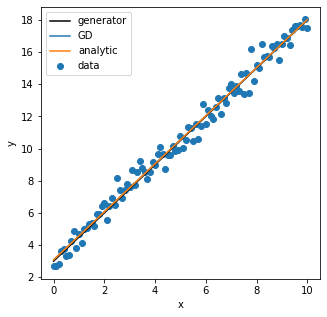

In [37]:
# Plot the data
plt.figure(figsize=(5,5))
plt.plot(x,a*x+b,color='k',label="generator")
plt.scatter(x,y,label="data")
plt.plot(x,x*params_GD[-1,0] + params_GD[-1,1],label="GD")
plt.plot(x,x*sol[0] + sol[1],label="analytic")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### Linear Example - Optimization Surface ####
For this example the solution we obtain is insensitive to the initial guess  because the model is linear and so the MSE loss function has guaranteed convex curvature. In simple terms, this means that the parameter surface forms a big bowl with only a single minimum. For non-linear problems (which are of most interest in ML research) initial guess dependencies are a common challenge. Stochastic gradient descent and gradient descent with momentum both partly address initial guess dependencies, but in a heuristic rather than guaranteed fashion. 

The convexity can be easily seen by plotting the optimization surface directly. The optimization surface is a plot with the model parameters as independent variables and objective function ($\chi^2$ in this case) as a dependent variable. In the case of a 2D model, this makes an easily visualized surface.

We'll make several such plots, so we'll write a couple functions to speed up this repetitive process. The first simply returns the loss function for a given set of parameters and x,y data, the second makes a surface plot overlaid with contours and lines:

In [0]:
# Define loss function for the problem (MSE)
def loss(params,x,y):
  return np.mean((params[0]*x + params[1] - y)**(2.0),axis=0)

# Define surface plot function                                                                                                                                                                                               
def surf_plot(x,y,f,lines=(),dims=(4.5,4),n=10,labels=None):

  # Make x,y,z grid
  X, Y = np.meshgrid(x, y)
  Z = np.zeros(X.shape)
  for count_i,i in enumerate(x):
      for count_j,j in enumerate(y):
          Z[count_i,count_j] = f(np.array([i,j]))

  # Make contour plot
  fig = plt.figure(figsize=dims)
  contours = plt.contour(Y, X, Z.T, n, colors='black') # note reverse order for contour and imshow
  plt.clabel(contours, inline=True, fontsize=8) # contour labels
  plt.imshow(Z, extent=[min(y), max(y), min(x), max(x)], origin='lower',
              cmap='RdGy', alpha=0.5) # note, x is treated as y and y as x in imshow
  cbar = plt.colorbar()

  # List of colors for line plots
  # Note: because of imshow behavior, x and y are reversed for plotting
  color_list = [(0.05,0.35,0.75),(0.05,0.8,0.6),(0.9,0.3,0.05),(0.05,0.05,0.05),(0.9,0.6,0.05),(0.9,0.5,0.7),(0.35,0.7,0.9),(0.95,0.9,0.25)] 
  for count_i,i in enumerate(lines):
    if labels:
      plt.plot(i[:,1],i[:,0],linestyle='-',linewidth=1.0,marker='.',markersize=10.0,color=color_list[count_i],label=labels[count_i])
    else:
      plt.plot(i[:,1],i[:,0],linestyle='-',linewidth=1.0,marker='.',markersize=10.0,color=color_list[count_i])
  
  # Set labels and clean up layout
  plt.xlim(min(y),max(y))
  plt.ylim(min(x),max(x))
  plt.ylabel("a",fontsize=14,labelpad=10)
  plt.xlabel("b",fontsize=14,labelpad=10)
  if labels: plt.legend()
  cbar.ax.set_ylabel('L')
  plt.tight_layout()
  plt.show()


<b>Note:</b> `imshow()` defaults to plotting the first variable along y and and the second variable along x, this is the cause of the counter-intuitive indexing in the `plt.contours()` and `plt.plot()` calls. 

Let's make a plot of the optimization surface for a range of `a` and `b` parameters and overlay the progress of our gradient descent optimization: 

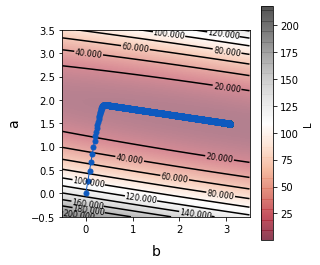

In [20]:
# Generate xhi^2 values for "a" and "b" surface 
L = lambda params: loss(params,x,y)
params_GD = grad_descent([[0.0,0.0]],grad_0,alpha=0.002,thresh=1E-7)
surf_plot(np.linspace(a-2,a+2, 101),np.linspace(a-2,a+2, 101),L,[params_GD])

This looks more like a trough than the bowl I promised. In fact, if we zoom out we would see that it is an elliptical bowl. This is because our features have not been standardized. That is, $\chi^2$ has a stronger dependence on $a$ than on $b$, so optimization first occurs by moving along the $a$ parameter (relatively fast), since it dominates the gradient, before optimizing along the $a$ parameter (relatively slowly). 

Think about this for a minute. One of our parameters is slowly moving and the other is rapidly moving. Can you think of any modification to the algorithm that would make the two parameters converge at a similar rate? What if we used a different learning rate for each parameter, based each parameter's local gradient? This is just a teaser, but it is the motivation for algorithms like `adagrad` and `rmsprop` (discussed later).

#### Linear Example - Data Standardization ####
This path clearly isn't optimal. Wouldn't it be better is somehow we could have moved along a straight line? Well, it turns out that a simple trick will make your optimization surface a bowl (in linear least-squares problems). If we standardize our data according to

$$ \mathbf{x}_{std} = \frac{\mathbf{x} - \mu_{x}}{\sigma_{x}} $$

where $\mu_{x}$ is the mean of $\mathbf{x}$ and $\sigma_{x}$ is the standard deviation of $\mathbf{x}$. As we can show, the optimization surface is transformed into a bowl and the optimization proceeds along a straight line. 


Final params (after 2645 epochs; 267145 d-calcs):
a: 0.9934
b: -0.0000


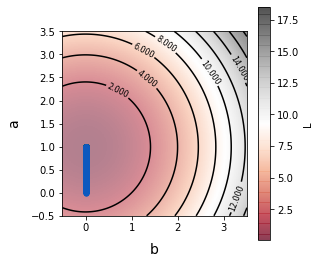

In [21]:
# Define standardized quantities
x_std = (x - np.mean(x))/np.std(x)
y_std = (y - np.mean(y))/np.std(y)
L_std = lambda params: loss(params,x_std,y_std)
grad_std = lambda params: grad(params,x_std,y_std) 
params_std = grad_descent([[0.0,0]],grad_std,alpha=0.002,thresh=1E-7)
print("\nFinal params (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(params_std),len(params_std)*len(x),params_std[-1,0],params_std[-1,1]))
surf_plot(np.linspace(a-2,a+2, 101),np.linspace(a-2,a+2, 101),L_std,[params_std])

As promised, the optimization surface has become a bowl, and now the optimization proceeded in a straight line. 

<b>Note:</b> when you perform data standardization before training your model, you need to unstandardize the predicted values to compare with the original data.  

As promised, the optimization surface has been transformed into a bowl, and the optimization path is a straight line. This has the practical advantage that the solution is obtained in less iterations and correspondingly less gradient calculations.

<b>Note:</b> the standardized model returns different parameters than the unstandardized model. That's because the predictions (y) and input features (x) are standardized. To use the outputs from the standardized model, we simply need standardize the inputs (i.e., subtract mean and divide by standard deviations) and unstandardize the outputs (multiply by standard deviation and add mean). 

It is also useful to make a plot of the predictions for intermediate parameterizations:

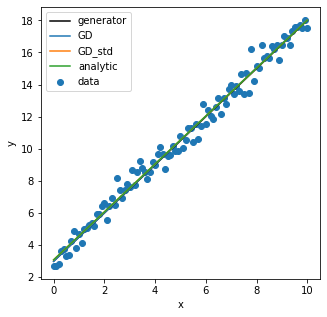

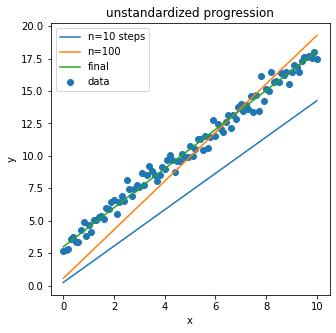

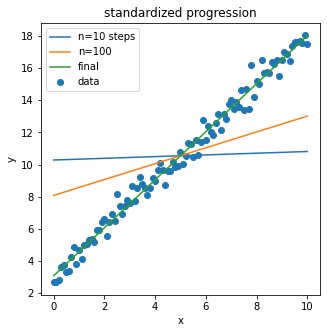

In [41]:
# Plot final fits for all models
plt.figure(figsize=(5,5))
plt.plot(x,a*x+b,color='k',label="generator")
plt.scatter(x,y,label="data")
plt.plot(x,x*params_GD[-1,0] + params_GD[-1,1],label="GD")
plt.plot(x,(x_std*params_std[-1,0] + params_std[-1,1])*np.std(y) + np.mean(y),label="GD_std")
plt.plot(x,x*sol[0] + sol[1],label="analytic")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plot fit progression for unstandardized GD (redo fit with baseline hyperparameters)
grad_0 = lambda params: grad(params,x,y) # give the grad function x and y data 
params_GD = grad_descent([[0.0,0.0]],grad_0,alpha=0.002,thresh=1E-4)
plt.figure(figsize=(5,5))
plt.scatter(x,y,label="data")
plt.plot(x,x*params_GD[9,0] + params_GD[9,1],label="n=10 steps")
plt.plot(x,x*params_GD[100,0] + params_GD[100,1],label="n=100")
plt.plot(x,x*params_GD[-1,0] + params_GD[-1,1],label="final")
plt.xlabel("x")
plt.ylabel("y")
plt.title("unstandardized progression")
plt.legend()

# Plot fit progression for standardized GD
plt.figure(figsize=(5,5))
plt.scatter(x,y,label="data")
plt.plot(x,(x_std*params_std[9,0] + params_std[9,1])*np.std(y) + np.mean(y),label="n=10 steps")
plt.plot(x,(x_std*params_std[100,0] + params_std[100,1])*np.std(y) + np.mean(y),label="n=100")
plt.plot(x,(x_std*params_std[-1,0] + params_std[-1,1])*np.std(y) + np.mean(y),label="final")
plt.xlabel("x")
plt.ylabel("y")
plt.title("standardized progression")
plt.legend()
plt.show()

#### Problems with Gradient Descent ####
Now that you've seen gradient descent in action, I want to point out some obvious shortcomings of the algorithm. 

- <b>Problem 1:</b> If we have a lot of data then evaluating the gradient can quickly become very expensive. Approximate gradient evaluations might be very useful for problems with lots of data.
- <b>Problem 2:</b> The algorithm <b>only</b> uses the local gradient for deciding how to update the parameters. The algorithm doesn't use the second derivative or knowledge about the previous updates, which might be potentially valuable sources of information.
- <b>Problem 3:</b> The algorithm uses a fixed learning rate, $\alpha$, that is the same for all of the parameters. Based on the unnormalized parameterization example, we might anticipate that different parameters might benefit from distinct learning rates (i.e., $\alpha$ could be a vector rather than a scalar).

Each of these three problems motivate the specific extensions to gradient descent that will be covered below. Specifically, we'll introduce the "stochastic" modification which will make our gradient evaluations much less expensive (addresses problem 1). We'll then introduce the concept of momentum that will elegantly incorporate information from previous updates (one solution to problem 2). Finally, we'll introduce versions of gradient descent with adaptive learning rates that will change the learning rate for each parameter based upon its partial derivative at each step (addresses problem 3).

### Stochastic Gradient Descent ###

A powerful variant of gradient descent is <b>stochastic</b> gradient descent. You may have noticed that to calculate the gradient over the whole data set was our most costly step, since it involved a loop over all of the data. In more complicated applications (say where we have hundreds of millions of samples) calculating the gradient using all of the data at every step might even become impossible for typical hardware. In stochastic gradient descent, instead of using all of the data, we use a single randomly selected sample to approximate the gradient at each step. The corresponding equation for the update is identical to regular gradient descent, except that the gradient is now evaluated with respect to a single sample:

$$ \boldsymbol{\beta}^\mathrm{i+1} = \boldsymbol{\beta}^\mathrm{i} - \alpha \boldsymbol{\nabla}_{j\in N}f\left(\boldsymbol{\beta}^\mathrm{i}\right) $$

Here the $j\in N$ notation indicates a single sample ($j$) randomly chosen from the $N$ available. To modify our existing GD implementation, we will need to (1) update our gradient evaluation function so that it accepts a sample index to evaluate the gradient with respect to, and (2) add a random number generator so that each time the gradient is called a different index is used:


In [0]:
# Differs from previous by index parameter r (only calculates gradient with respect to x/y samples at r index).
def grad_stoch(params,r,x,y):
  return np.array([np.mean(2.0*(params[0]*x[r]+params[1]-y[r])*x[r]),np.mean(2.0*(params[0]*x[r]+params[1]-y[r]))])

# Our stochastic gradient descent function. New parameter N tells the function
# how many samples there are in the training data. 
def grad_descent_stoch(params,grad,N,alpha=0.002,thresh=0.00001,max=1E6): 
    
    # Each iteration is one epoch
    for i in range(int(max)):
        
        # We'll only save parameters for each epoch (N updates)
        params += [params[-1]]
        for j in range(N):
            params[-1] = params[-1] - alpha * grad(params[-1],np.random.randint(N,size=1))

        # Check break conditions
        if np.sum((params[-1]-params[-2])**(2.0))**(0.5) < thresh:
            return np.array(params)
    
    # return the parameters as a numpy array            
    print("WARNING: maximum number of iterations reached ({})".format(max))
    return np.array(params)

Here the `grad_stoch` and `grad_descent_stoch` functions are the stochastic analogs of the earlier functions. The main difference is that the `grad_stoch` function accepts an index `r` corresponding to the sample the gradient is being evaluated with respect to. Likewise, the `grad_descent_stoch` function accepts a parameter `N` that corresponds to the sample size for the purpose of choosing the random sample at each update step. 

Let's compare our new SGD implementation with the old GD implementation on the standardized data:


SGD with standardization (after 100 epochs; 10201 d-calcs):
a: 0.9929
b: -0.0139

GD with standardization (after 606 epochs; 61206 d-calcs):
a: 0.9934
b: -0.0000


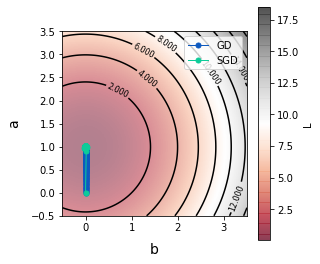

In [23]:
# Perform the SGD optimization with only 100 epochs
grad_stoch_std = lambda params,r: grad_stoch(params,r,x_std,y_std) 
params_stoch_std = grad_descent_stoch([[0,0]],grad_stoch_std,len(x_std),alpha=0.01,thresh=1E-7,max=100)
print("\nSGD with standardization (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(params_stoch_std)-1,len(params_stoch_std)*len(x),params_stoch_std[-1,0],params_stoch_std[-1,1]))

# Perform the GD optimization until reaching convergence
grad_std = lambda params: grad(params,x_std,y_std) 
params_std = grad_descent([[0.0,0]],grad_std,alpha=0.01,thresh=1E-7)
print("\nGD with standardization (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(params_std),len(params_std)*len(x),params_std[-1,0],params_std[-1,1]))

# Compare the trajectories on the same optimization surface
surf_plot(np.linspace(a-2,a+2, 101),np.linspace(a-2,a+2, 101),L_std,[params_std,params_stoch_std],labels=["GD","SGD"])


There are a few interesting comparisons with regular gradient descent. First, we observe that we obtain a pretty good solution very quickly. For example, after a single iteration through the data, the solution is close to the non-stochastic solution while costing much less to evaluate the derivate. Second, we can use the standardization trick with any optimizer. For many models standardization of the features is critical, whereas I don't know of any case where it hurts. This is especially true of deep learning models where standardization is a prerequisite for effectively training activation functions. Third, we observe that more iterations eventually lead to oscillations about the correct solution, but not necessarily an improved answer (experiment with the above cell using more iterations for SGD to see this clearly). This is because of the interplay between the stochastic element and the learning rate ($\alpha$). A large learning rate increases convergence initially, but then limits convergence near the real solution as random sampling leads to oscillations in the minimum. 

#### Learning schedules ####
Since stochastic gradient descent is so sensitive to the learning rate, it is usually optimal to vary the learning rate as the algorithm proceeds in order to manage the convergence/learning rate tradeoff. For instance, in the current example it seems optimal to start with a relatively large learning rate, while reducing it as we get closer to the actual solution. There are many different learning schedules that you will see implemented in the literature (see the lecture notes for additional examples). 

Here we will implement an expoential decay in the learning rate:

$$ \alpha = \alpha_0 e^{-rt} $$

where $\alpha_0$ is the initial learning rate, $r$ is a parameter that determines the decay (larger is faster), and $t$ is the number of epochs. The modification to our SGD algorithm is again just a single line and one new input parameter for $r$:


In [0]:
# Our stochastic gradient descent function with exponential decay option.
def grad_descent_stoch(params,grad,N,alpha=0.002,thresh=0.00001,max=1E6,decay=0.0): 
    
    # Each iteration is one epoch
    for i in range(int(max)):
        
        # We'll only save parameters for each epoch (N updates)
        params += [params[-1]]
        
        # Exponential alpha decay (decay=0 is same as original)
        a = alpha*np.exp(-decay*i)
        
        # Perform updates for the epoch
        for j in range(N):
            params[-1] = params[-1] - a * grad(params[-1],np.random.randint(N,size=1))

        # Check break conditions
        if np.sum((params[-1]-params[-2])**(2.0))**(0.5) < thresh:
            return np.array(params)
    
    # return the parameters as a numpy array            
    print("WARNING: maximum number of iterations reached ({})".format(max))
    return np.array(params)

We can again compare our algorithm with exponential decay against one without. We'll use the unstandardized training to accentuate the difference.


SGD no decay (after 1000 epochs; 101101 d-calcs):
a: 1.3612
b: 3.0528

SGD decay (after 139 epochs; 14140 d-calcs):
a: 1.4949
b: 3.0627


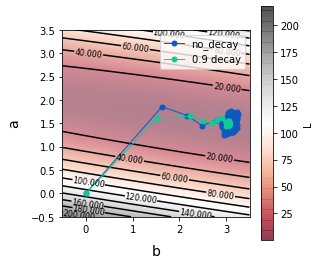

In [25]:
# Perform the SGD optimization without decay
grad_stoch_0 = lambda params,r: grad_stoch(params,r,x,y) 
params_stoch = grad_descent_stoch([[0,0]],grad_stoch_0,len(x),alpha=0.01,thresh=1E-7,max=1000)
print("\nSGD no decay (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(params_stoch)-1,len(params_stoch)*len(x),params_stoch[-1,0],params_stoch[-1,1]))

# Perform the SGD optimization with decay
params_stoch_d = grad_descent_stoch([[0,0]],grad_stoch_0,len(x),alpha=0.01,thresh=1E-7,max=1000,decay=0.1)
print("\nSGD decay (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}".format(len(params_stoch_d)-1,len(params_stoch_d)*len(x),params_stoch_d[-1,0],params_stoch_d[-1,1]))

# Compare the trajectories on the same optimization surface
surf_plot(np.linspace(a-2,a+2, 101),np.linspace(a-2,a+2, 101),L,[params_stoch,params_stoch_d],labels=["no_decay","0.9 decay"])


At the start of each trajectory the decay has little effect and the blue and green curves look very similar. At the end of the trajectory, SGD without decay oscillates around the true minimum (because of the stochastic evaluation of the derivative), whereas SGD with decay settles into the true minimum. Experiment with faster decay rates until you see the danger of decaying too fast. 

#### Mini-batch Variant ####
Maybe you are wondering, "why use only one sample when evaluating the gradient?" Indeed, only using one sample seems like it might be a little too aggresive of an approximation. Perhaps it would be better to use $n$ samples to approximate the gradient, where $n$ is greater than 1 (SGD) but less than N (GD)? This is exactly what the <b>mini-batch</b> variant of gradient descent does. 
    
The main advantage of the mini-batch variant is that you can usually leverage vectorization to operate very efficiently on small to medium sized batches of samples. This makes better use of available data (potentially improving over SGD) while also alleviating the potentially impossible task of calculating the gradient with respect to all of the data at once (improving over GD). The specific choice of $n$ that is useful will depend on the problem under study. 

To modify our SGD function in order to accomodate mini-batch we just need to add one parameter `n`, to control how many samples to use when evaluating the gradient (`n=1` will just perform regular SGD). The `grad_stoch` function can be used unmodified since arrays allow lists of indices to be supplied:

In [0]:
# Same as before, but pasted for reference
def grad_stoch(params,r,x,y):
  return np.array([np.mean(2.0*(params[0]*x[r]+params[1]-y[r])*x[r]),np.mean(2.0*(params[0]*x[r]+params[1]-y[r]))])

# Our minibatch stochastic gradient descent function with exponential decay option.
def MBSGD(params,grad,N,alpha=0.002,thresh=0.00001,max=1E6,decay=0.0,n=1): 
    
    # Each iteration is one epoch
    for i in range(int(max)):
        
        # We'll only save parameters for each epoch (N updates)
        params += [params[-1]]
        
        # Exponential alpha decay (decay=0 is same as original)
        a = alpha*np.exp(-decay*i)
        
        # Perform updates for the epoch
        for j in range(int(N/n)):
            params[-1] = params[-1] - a * grad(params[-1],np.random.randint(N,size=n))

        # Check break conditions
        if np.sum((params[-1]-params[-2])**(2.0))**(0.5) < thresh:
            return np.array(params)
    
    # return the parameters as a numpy array            
    print("WARNING: maximum number of iterations reached ({})".format(max))
    return np.array(params)

We can again perform a comparison of the various algorithms:


SGD decay (after 141 epochs; 14342 d-calcs):
a: 1.4991
b: 3.0539
xhi2: 0.2523

MBSGD decay (after 1000 epochs; 101101 d-calcs):
a: 1.4957
b: 3.0629
xhi2: 0.2520

GD decay (after 2383 epochs; 240784 d-calcs):
a: 1.4930
b: 3.0823
xhi2: 0.2519


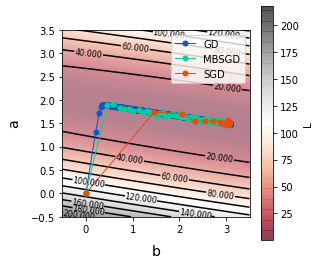

In [27]:
# Perform the SGD optimization with decay
grad_stoch_0 = lambda params,r: grad_stoch(params,r,x,y) 
params_stoch_d = grad_descent_stoch([[0,0]],grad_stoch_0,len(x),alpha=0.01,thresh=1E-7,max=1000,decay=0.1)
print("\nSGD decay (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}\nxhi2: {:<6.4f}".\
      format(len(params_stoch_d)-1,len(params_stoch_d)*len(x),params_stoch_d[-1,0],params_stoch_d[-1,1],L(params_stoch_d[-1])))

# Perform the n=10 MBSGD optimization with decay
params_mbsgd = MBSGD([[0,0]],grad_stoch_0,len(x),alpha=0.01,thresh=1E-7,max=1000,decay=0.01,n=10)
print("\nMBSGD decay (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}\nxhi2: {:<6.4f}".\
      format(len(params_mbsgd)-1,len(params_mbsgd)*len(x),params_mbsgd[-1,0],params_mbsgd[-1,1],L(params_mbsgd[-1])))

# Perform GD
grad_0 = lambda params: grad(params,x,y) # give the grad function x and y data 
params_GD = grad_descent([[0,0]],grad_0,alpha=0.01,thresh=1E-7)
print("\nGD decay (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}\nxhi2: {:<6.4f}".\
      format(len(params_GD)-1,len(params_GD)*len(x),params_GD[-1,0],params_GD[-1,1],L(params_GD[-1])))

# Compare the trajectories on the same optimization surface
surf_plot(np.linspace(a-2,a+2, 101),np.linspace(a-2,a+2, 101),L,[params_GD,params_mbsgd,params_stoch_d],labels=["GD","MBSGD","SGD"])


For the chosen $\alpha$ and $n$ the results aren't dramatic, but you should be able to tell that mini-batch variant is less sensitive to random fluctuations that result from sampling error (since the sampling error for normal distributions goes as $\sqrt{n}$, we are reducing our noise by about 1/3). If you experiment with different parameters then you can get more dramatic results. For non-linear optimization sufaces the effects are also typically more pronounced. 

### Momentum ###
In the simple linear case maybe it has occured to you that the gradient from the previous epoch might be useful for predicting the direction we should go in the current epoch. More generally, there are many advantages to mixing in the previous gradient evaluation with the current evaluation. In analogy with kinematics, this concept is called momentum--meaning if your optimizer is already heading in a certain direction, it will have a tendency to continue heading in that direction depending on the value of a parameter ($\eta$). The momentum correction ($\mathbf{m}$) consists of just one additional term ($\eta\mathbf{m}$):

$$ \mathbf{m}_\mathrm{i+1} = \eta\mathbf{m}_\mathrm{i} - \alpha \boldsymbol{\nabla}_{\beta}f\left(\boldsymbol{\beta}_\mathrm{i}\right) $$

$$ \boldsymbol{\beta}_\mathrm{i+1} = \boldsymbol{\beta}_\mathrm{i} + \mathbf{m}_{i+1}$$

Where $\eta$ is a number between 0 and 1, and $\mathbf{m}_\mathrm{0}=0$. When $\eta=0$ we recover the original GD algorithm. When $\eta=0.9$ you can think of this like mixing in information from the last ten gradient calculations. From the equations, you can also see that momentum can be stacked on top of either the GD, SGD, and the mini-batch variants, since these just affect how the gradient is calculated.

You might have noticed that the gradient for the momentum correction is evaluated at the "old" position $\boldsymbol{\beta}^i$ in the above equation. An even better variant (Nesterov momentum) performs the gradient calculation at the approximate position $\boldsymbol{\beta}_\mathrm{i} + \eta \mathbf{m}_\mathrm{i}$ (see lecture notes for longer discussion, but in short this is better): 

$$ \mathbf{m}_\mathrm{i+1} = \eta\mathbf{m}_\mathrm{i} - \alpha \boldsymbol{\nabla}_{\beta}f\left(\boldsymbol{\beta}_\mathrm{i} + \eta \mathbf{m}_\mathrm{i}\right) $$
$$ \boldsymbol{\beta}_\mathrm{i+1} = \boldsymbol{\beta}_\mathrm{i} + \mathbf{m}_\mathrm{i+1}$$

Adding nesterov momentum to our MBSGD function just requires two lines, (1) to initialize the `m` vector to 0, (2) the `m` update:

In [0]:
# Our minibatch stochastic gradient descent function with exponential decay option and momentum.
def MBSGD(params,grad,N,alpha=0.002,thresh=0.00001,max=1E6,decay=0.0,n=1,mom=0.0): 
    
    # Initialize momentum vector
    m = np.zeros(len(params[0]))

    # Each iteration is one epoch
    for i in range(int(max)):
        
        # We'll only save parameters for each epoch (N updates)
        params += [params[-1]]
        
        # Exponential alpha decay (decay=0 is same as original)
        a = alpha*np.exp(-decay*i)
        
        # Perform updates for the epoch
        for j in range(int(N/n)):
            m = mom*m - a*grad(params[-1] + mom*m,np.random.randint(N,size=n))
            params[-1] = params[-1] + m

        # Check break conditions
        if np.sum((params[-1]-params[-2])**(2.0))**(0.5) < thresh:
            return np.array(params)
    
    # return the parameters as a numpy array            
    print("WARNING: maximum number of iterations reached ({})".format(max))
    return np.array(params)

We can again perform a comparison of the various algorithms. For a demonstration we will use the unstandardized optimization problem, because it provides a clearer effect of momentum. Otherwise, there is no reason not to use feature standardization with momentum. 


SGD decay (after 134 epochs; 13635 d-calcs):
a: 1.4945
b: 3.0805
xhi2: 0.2520

SGD (mom=0.9) (after 139 epochs; 14140 d-calcs):
a: 1.4958
b: 3.0648
xhi2: 0.2520

GD decay (after 2383 epochs; 240784 d-calcs):
a: 1.4930
b: 3.0823
xhi2: 0.2519


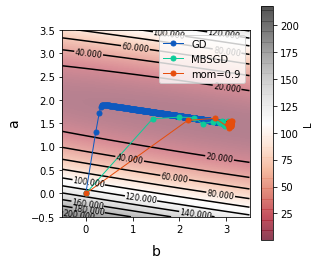

In [29]:
# Perform the SGD optimization with decay
grad_stoch_0 = lambda params,r: grad_stoch(params,r,x,y) 
params_stoch_d = grad_descent_stoch([[0,0]],grad_stoch_0,len(x),alpha=0.01,thresh=1E-7,decay=0.1)
print("\nSGD decay (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}\nxhi2: {:<6.4f}".\
      format(len(params_stoch_d)-1,len(params_stoch_d)*len(x),params_stoch_d[-1,0],params_stoch_d[-1,1],L(params_stoch_d[-1])))

# Perform GD-mom optimization mom=0.9
mom_9 = MBSGD([[0,0]],grad_stoch_0,len(x),alpha=0.002,thresh=1E-7,n=1,mom=0.9,max=1E3,decay=0.1)
print("\nSGD (mom=0.9) (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}\nxhi2: {:<6.4f}".\
      format(len(mom_9)-1,len(mom_9)*len(x),mom_9[-1,0],mom_9[-1,1],L(mom_9[-1])))

# Perform GD
grad_0 = lambda params: grad(params,x,y) # give the grad function x and y data 
params_GD = grad_descent([[0,0]],grad_0,alpha=0.01,thresh=1E-7)
print("\nGD decay (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}\nxhi2: {:<6.4f}".\
      format(len(params_GD)-1,len(params_GD)*len(x),params_GD[-1,0],params_GD[-1,1],L(params_GD[-1])))

# Compare the trajectories on the same optimization surface
surf_plot(np.linspace(a-2,a+2, 101),np.linspace(a-2,a+2, 101),L,[params_GD,params_stoch_d,mom_9],labels=["GD","MBSGD","mom=0.9"])

All of the algorithms converge to a similar solution but take distinct paths. GD takes the longest (in terms of epochs), SGD without momentum intermediate, and SGD with momentum the least. In the latter case we have combined the advantages of the momentum concept with SGD, but it has also required fine tuning the hyperparameters (in particular, reducing the learning rate and using a decay). Combining SGD with momentum appears to let the algorithm "cut the corner", but this is actually misleading because we are only showing the updates after each epoch. In SGD, remember that every epoch actually consists of `N` updates, which is responsible for the appearance of cutting the corner. 

As a further illustration of what is happening with momentum, we will vary the momentum factor, and slightly modify the `MBSGD` function so that it also returns the intermediate parameter updates (rather than just the updates after a full epoch). We'll also turn off the learning rate decay so that you can see the momentum effect more purely (and how it increases variance in the final answer). 

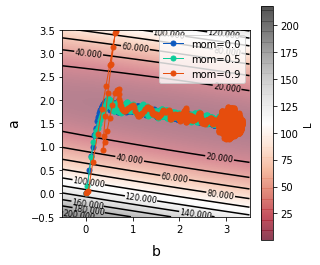

In [30]:
# For illustration purposes, we'll use this version to return all of the updates
# (not just every epoch like the above version)
def MBSGD_all(params,grad,N,alpha=0.002,thresh=0.00001,max=1E6,decay=0.0,n=1,mom=0.0): 
    m = np.zeros(len(params[0]))
    for i in range(int(max)):
        a = alpha*np.exp(-decay*i)
        for j in range(int(N/n)):
            m = mom*m - a*grad(params[-1] + mom*m,np.random.randint(N,size=n))
            params += [params[-1] + m]
        if np.sum((params[-1]-params[-2])**(2.0))**(0.5) < thresh:
            return np.array(params) 
    return np.array(params)

# Perform GD-mom optimization mom=0.9
mom_0 = MBSGD_all([[0,0]],grad_stoch_0,len(x),alpha=0.002,thresh=1E-5,n=1,mom=0,max=1E3)
mom_5 = MBSGD_all([[0,0]],grad_stoch_0,len(x),alpha=0.002,thresh=1E-5,n=1,mom=0.5,max=1E3)
mom_9 = MBSGD_all([[0,0]],grad_stoch_0,len(x),alpha=0.002,thresh=1E-5,n=1,mom=0.9,max=1E3)

# Compare the trajectories on the same optimization surface
surf_plot(np.linspace(a-2,a+2, 101),np.linspace(a-2,a+2, 101),L,[mom_0,mom_5,mom_9],labels=["mom=0.0","mom=0.5","mom=0.9"])


Plotting every update you can see that the momentum trajectories actually follow the GD pathways and do not cut the corner as it appeared in the previous example. You can also see that as the momentum factor increases (`mom`) the trajectory tends to overshoot the minimum. This is consistent with the momentum concept of a ball rolling down a gradient, crossing the minimum, and going up the other side before turning around (experiment with different `mom` values to see how this varies). Also note that the final uncertainty in parameters increases with the momentum factor when we don't use the learning rate decay. 

As with learning schedules, many algorithms employ momentum concepts, so what you have learned with respect to GD should give you an intuition for how momentum can affect convergence in other cases. 

### Adaptive Learning Rates ###
On the unstandardized optimization surfaces it is clear that the variation along `a` initially dominates the optimization, whereas the variation along `b` is much smaller. Let's suppose that we could use independent learning rates for `a` and `b`. Which one would you want to be larger and which one would you want to be smaller? 

For this problem it seems like the learning rate for `b` could be much larger than for `a` because its gradient is much smaller. More generally, the gradients might vary dramatically over the course of the optimization, and we might want to update the learning rates as we go using this information. These concepts (i.e., parameter specific learning rates and learning rates that change based on the optimization surface) are known as <b>adaptive learning rates</b>. 

#### Adaptive Gradient Algorithm (AdaGrad) ####
The first extension to gradient descent that we'll cover that is motivated by adaptive learning rates is <b>AdaGrad</b>. AdaGrad implements parameter specific learning rates that are updated at each step based on the local gradient with respect to each parameter. We will still have a base learning rate $\alpha$ but parameters with large gradients will scale this rate to be smaller, and parameters with small gradients will scale this rate to be larger. The form of the update is:

$$ \mathbf{A}_\mathrm{i+1} = \mathbf{A}_\mathrm{i} + \mathrm{diag}\left[\boldsymbol{\nabla}_{\beta}f\left(\beta_\mathrm{i}\right)\right]^2 $$ 

$$ \boldsymbol{\beta}_\mathrm{i+1} = \boldsymbol{\beta}_\mathrm{i} - \frac{\mathbf{\alpha}}{\sqrt{\mathbf{A}_\mathrm{i+1}}+\mathrm{diag}\left(\varepsilon\right)} \boldsymbol{\nabla}_{\beta}f\left(\boldsymbol{\beta}_\mathrm{i}\right)$$

Here, $\mathbf{A}$ is the quantity that governs the update to the effective learning rate and $\alpha$ is a base learning rate. $\mathrm{diag}()$ refers to a diagonal matrix with zeroes for the off-diagonal elements. Thus $\mathrm{diag}\left[\mathbf{\nabla}_{\beta}f\left(\boldsymbol{\beta}_\mathrm{i}\right)\right]^2$ has the square of each partial derivative along the diagonal of the matrix. We use the square because we care about the magnitude of the gradient, not its sign. In the expression for $\boldsymbol{\beta}$, $\mathbf{A}$ appears in the denominator, and we take the square root. Dividing by a matrix isn't valid linear algebra, but here the notation is used to indicate the dot product between the inverse of the diagonal matrix in the denominator with the $\mathbf{\nabla}_{\beta}f\left(\boldsymbol{\beta}_\mathrm{i}\right)$ vector. Finally, $\varepsilon$ is typically a small fixed value (e.g., 1E-4) and the $\mathrm{diag}\left(\varepsilon\right)$ matrix is used with to avoid division by zero if elements in $\mathbf{A}$ are too small. 

A lot of text went into explaining the AdaGrad equations, but the modification is actually very intuitive. At each step, the effective learning rate for each parameter is the base learning rate divided by the (cumulative) magnitude of its partial derivative. For parameters with small gradients, this increases the effective learning rate, for parameters with large gradients, this decreases the effective learning rate. That's really all there is to it, the $\varepsilon$ thing is just to deal with pathological cases. Likewise, we use diagonal matrices, because the square root can be easily calculated. However, "full-matrix" extensions to adagrad are actively researched, but won't be covered here. Since we are only using the diagonal of the $\mathbf{A}$ here, you could also just think of $\mathbf{A}$ as being a vector and the division as being element-wise, but I have used the $\mathrm{diag}(\mathbf{A})$ form to imply the generalization. 

If you are still paying attention, you can also see a potential problem with AdaGrad, in that the matrix $\mathbf{A}$ just keeps getting bigger and bigger (and correspondingly, the effective learning rate will monotonically decrease). For this reason AdaGrad is prone to stopping too early and we'll address that with our next adaptive learning rate algorithm (rmsprop). 

Let's implement AdaGrad in python using the `MBSGD` function without momentum as a starting point:




In [0]:
# AdaGrad based on our minibatch stochastic gradient descent function.
def adagrad(params,grad,N,alpha=0.002,thresh=0.00001,max=1E6,n=1,eps=1E-6): 
    
    # Initialize A and eps vectors (diagonal only case)
    A = np.zeros(len(params[0]))
    eps = np.array([eps]*len(params[0]))

    # Each iteration is one epoch
    for i in range(int(max)):
        
        # We'll only save parameters for each epoch (N updates)
        params += [params[-1]]
        
        # Perform updates for the epoch
        for j in range(int(N/n)):
            g = grad(params[-1],np.random.randint(N,size=n))
            A = A + g**(2.0)
            params[-1] = params[-1] - alpha*np.dot(np.diag(1.0/(A**(0.5)+eps)),g)

        # Check break conditions
        if np.sum((params[-1]-params[-2])**(2.0))**(0.5) < thresh:
            return np.array(params)
    
    # return the parameters as a numpy array            
    print("WARNING: maximum number of iterations reached ({})".format(max))
    return np.array(params)

Only three lines have been added. The first two are the initializations of the `A` and `eps` matrices. The last is the calculation of the `A` update (`A= A + g**(2.0)`) and the parameter update line has been changed to reflect the second AdaGrad equation. 

Let's use our AdaGrad implementation to parameterize our model for this problem and visualize the parameter trajectory on the optimization surface:


AdaGrad (after 4251 epochs; 429452 d-calcs):
a: 1.4916
b: 3.0822
xhi2: 0.2520


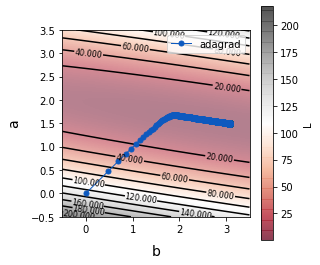

In [41]:
# Perform the parameterization with illustrative hyperparameters
params = adagrad([[0,0]],grad_stoch_0,len(x),alpha=0.1,thresh=1E-5,n=10,max=1E4,eps=1E-6)    
print("\nAdaGrad (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}\nxhi2: {:<6.4f}".\
      format(len(params)-1,len(params)*len(x),params[-1,0],params[-1,1],L(params[-1])))

# Compare the trajectories on the same optimization surface
surf_plot(np.linspace(a-2,a+2, 101),np.linspace(a-2,a+2, 101),L,[params],labels=["adagrad"])

In this example we can see a marked difference in the trajectory that AdaGrad takes in comparison with the other algorithms. AdaGrad seems to take a much more direct pathway to the minimum in comparison to the other gradient descent based algorithms. This is the result of the adaptive learning rate: by scaling the updates for each parameter by `A`, the slowly varying parameter's learning rate is boosted and the quickly varying parameter's learning rate is suppressed. The next result is that the optimization moves more directly towards the minimum compared with the other algorithms. (Experiment with the above cell to get a feel for the behavior of AdaGrad).

#### Root Mean Square Propagation (RMSProp) ####
While experimenting with AdaGrad, you may have noticed that despite the more direct path towards the minimum the optimization took many epochs to converge for typical base learning rates. The expression for `A` used by AdaGrad is the cumulative sum of the gradients, so `A` monotonically increases resulting in very small effective learning rates towards the end of the optimization. The idea behind RMSProp is that instead of calculating `A` based on all of the previous updates, we instead use only a fraction of the previous `A` in calculating the update (similar to momentum). The equations governing RMSProp are:

$$ \mathbf{A}_\mathrm{i+1} = \eta\mathbf{A}_\mathrm{i} + \left(1-\eta\right) \mathrm{diag}\left[\boldsymbol{\nabla}_{\beta}f\left(\boldsymbol{\beta}_\mathrm{i}\right)\right]^2 $$ 

$$ \boldsymbol{\beta}_\mathrm{i+1} = \boldsymbol{\beta}_\mathrm{i} - \frac{\mathbf{\alpha}}{\sqrt{\mathbf{A}_\mathrm{i+1}}+\mathrm{diag}\left(\varepsilon\right)} \boldsymbol{\nabla}_{\beta}f\left(\boldsymbol{\beta}_\mathrm{i}\right)$$

Here, $\eta$ is a new hyperparameter that determines what fraction of the old `A` to mix in with the current (squared) gradient (typically, $\eta=0.9,0.99,0.999$). The expression for the $\boldsymbol{\beta}$ update is unchanged with respect to AdaGrad. 

This tiny change addresses the early stopping issue of AdaGrad. We can implement RMSProp by modifying a single line in the `adagrad()` function and adding an input variable for $\eta$:


In [0]:
# AdaGrad based on our minibatch stochastic gradient descent function.
def rmsprop(params,grad,N,alpha=0.002,thresh=0.00001,max=1E6,n=1,eps=1E-6,eta=0.9): 
    
    # Initialize A and eps vectors (diagonal only case)
    A = np.zeros(len(params[0]))
    eps = np.array([eps]*len(params[0]))

    # Each iteration is one epoch
    for i in range(int(max)):
        
        # We'll only save parameters for each epoch (N updates)
        params += [params[-1]]
        
        # Perform updates for the epoch
        for j in range(int(N/n)):
            g = grad(params[-1],np.random.randint(N,size=n))
            A = eta*A + (1.0-eta)*g**(2.0)
            params[-1] = params[-1] - alpha*np.dot(np.diag(1.0/(A**(0.5)+eps)),g)

        # Check break conditions
        if np.sum((params[-1]-params[-2])**(2.0))**(0.5) < thresh:
            return np.array(params)
    
    # return the parameters as a numpy array            
    print("WARNING: maximum number of iterations reached ({})".format(max))
    return np.array(params)

Let's use RMSProp to parameterize our model, and compare the effect of varying `eta`:


eta=0.9 (after 10000 epochs; 1010101 d-calcs):
a: 1.5030
b: 3.0798
xhi2: 0.2550

eta=0.99 (after 10000 epochs; 1010101 d-calcs):
a: 1.4876
b: 3.1160
xhi2: 0.2522

eta=0.999 (after 10000 epochs; 1010101 d-calcs):
a: 1.5151
b: 3.0526
xhi2: 0.2625


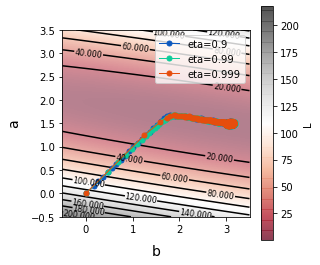

In [47]:
# Perform the parameterization with illustrative hyperparameters
p_9 = rmsprop([[0,0]],grad_stoch_0,len(x),alpha=0.01,thresh=1E-5,n=10,max=1E4,eps=1E-6,eta=0.9)    
print("\neta=0.9 (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}\nxhi2: {:<6.4f}".\
      format(len(p_9)-1,len(p_9)*len(x),p_9[-1,0],p_9[-1,1],L(p_9[-1])))

p_99 = rmsprop([[0,0]],grad_stoch_0,len(x),alpha=0.01,thresh=1E-5,n=10,max=1E4,eps=1E-6,eta=0.99)    
print("\neta=0.99 (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}\nxhi2: {:<6.4f}".\
      format(len(p_99)-1,len(p_99)*len(x),p_99[-1,0],p_99[-1,1],L(p_99[-1])))

p_999 = rmsprop([[0,0]],grad_stoch_0,len(x),alpha=0.01,thresh=1E-5,n=10,max=1E4,eps=1E-6,eta=0.999)    
print("\neta=0.999 (after {} epochs; {} d-calcs):\na: {:<6.4f}\nb: {:<6.4f}\nxhi2: {:<6.4f}".\
      format(len(p_999)-1,len(p_999)*len(x),p_999[-1,0],p_999[-1,1],L(p_999[-1])))

# Compare the trajectories on the same optimization surface
surf_plot(np.linspace(a-2,a+2, 101),np.linspace(a-2,a+2, 101),L,[p_9,p_99,p_999],labels=["eta=0.9","eta=0.99","eta=0.999"])

We can see that RMSProp exhibits similar behavior to AdaGrad with respect to "cutting the corner". Likewise, depending on the choice of `eta`, the learning is greatly accelerated. There is still a tendency for RMSProp to rattle around the minimum depending the value of `eta`.

### Appendix
#### f(x)=x^2
In the lecture notes I show the example of using gradient descent to minimize $x^2$. For completeness the associated code is shown below:

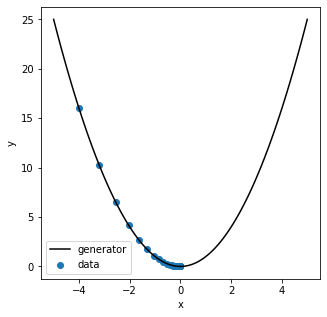

In [4]:
# Our gradient descent function
def grad_descent(params,grad,alpha=0.002,thresh=0.00001,max=1E6):    

    # Each iteration is one parameter update ("epoch")
    for i in range(int(max)):
        
        # Calculate update for this epoch/iteration
        params += [ params[-1] - alpha * grad(params[-1]) ]

        # Check break conditions
        if np.sum((params[-1]-params[-2])**(2.0))**(0.5) < thresh:
            return np.array(params)
    
    # return the parameters as a numpy array            
    print("WARNING: maximum number of iterations reached ({})".format(max))
    return np.array(params)

grad_0 = lambda x: 2*x

Variable learning rate examples, showing slow learning, perfect learning rate (0.5), and unstable learning rate (1.01).

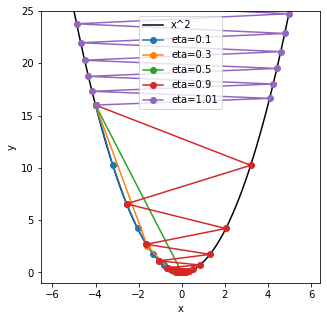

In [14]:
vals_0p1 = grad_descent([-4],grad_0,alpha=0.1)
vals_0p3 = grad_descent([-4],grad_0,alpha=0.3)
vals_0p5 = grad_descent([-4],grad_0,alpha=0.5)
vals_0p9 = grad_descent([-4],grad_0,alpha=0.9)
vals_1p01 = grad_descent([-4],grad_0,alpha=1.01,max=20)

# Generate a linear dataset 
a=1.5
b=3.
stdev=0.5
x=np.linspace(-5,5,101)
y=x**(2.0)

# Plot the data
plt.figure(figsize=(5,5))
plt.plot(x,x**(2.0),color='k',label="x^2")
plt.plot(vals_0p1,vals_0p1**(2.0),marker='o',label="eta=0.1")
plt.plot(vals_0p3,vals_0p3**(2.0),marker='o',label="eta=0.3")
plt.plot(vals_0p5,vals_0p5**(2.0),marker='o',label="eta=0.5")
plt.plot(vals_0p9,vals_0p9**(2.0),marker='o',label="eta=0.9")
plt.plot(vals_1p01,vals_1p01**(2.0),marker='o',label="eta=1.01")
plt.ylim(-1,25)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()